# This example contains the model with the leaver (TF-element)


In [1]:

import sys
sys.path.append("../../")
from bond_graph_simulation.core.base import ElementFactory
from bond_graph_simulation.core.BondGraph2 import BondGraphModel
from bond_graph_simulation.rules.engine import RuleEngine
from bond_graph_simulation.equations.generator import EquationGenerator
from bond_graph_simulation.equations.statespace import CauchyFormGenerator
from bond_graph_simulation.equations.statespace import StateSpaceBuilder
from bond_graph_simulation.numerical.simulation import BondGraphSimulator


from bond_graph_simulation.inout.visualizer import draw_bond_graph, custom_layered_layout
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Example 3: 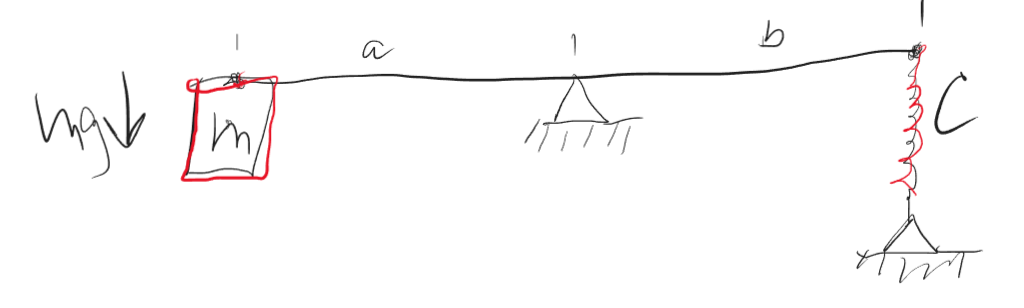

In [2]:
# Создаем модель
model = BondGraphModel(name='TF example')

#Create some elements
TF_1 = ElementFactory.create('TF', name='TF_1', )
SE_1 = ElementFactory.create('SE', name='SE_1', )

C_1 = ElementFactory.create('C', name='C_1', )
I_1 = ElementFactory.create('I', name='I_1',)

OneJ_1 = ElementFactory.create('1', name='1j_4')
OneJ_2 = ElementFactory.create('1', name='1j_5')
OneJ_3 = ElementFactory.create('1', name='1j_6', )
OneJ_4 = ElementFactory.create('1', name='1j_7', )

ZeroJ_1 = ElementFactory.create('0', name='0j_2',)

SF_1 = ElementFactory.create('SF', name='SF_1', )


In [3]:
# add a connections between elements in model
# Connect elements (same as old version)
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(TF_1, OneJ_1)
model.connect(TF_1, OneJ_2)
model.connect(OneJ_2, ZeroJ_1)
model.connect(ZeroJ_1, OneJ_3)
model.connect(ZeroJ_1, OneJ_4)
model.connect(C_1, OneJ_3)
# model.connect(R_1, OneJ_2)
model.connect(OneJ_4, SF_1)

In [4]:
engine = RuleEngine(model, debug=False)
engine.apply_all()

## Check model parameters

In [5]:
problems = engine.find_invalid_bonds()
if problems:
    print("Detected some unvalid bonds:")
    for p in problems:
        print(p)
else:
    print("Allrights!")

Allrights!


In [6]:
# ONLY FOR DEBUGING (IF U NEED) just printes the internal params of model
model.debug_display_elements_with_ports()

SE_1: Port Port_0 -> direction=Output, causality=Uncausal
1j_4: Port Port_1 -> direction=Input, causality=Causal
1j_4: Port Port_3 -> direction=Output, causality=Uncausal
1j_4: Port Port_5 -> direction=Output, causality=Causal
I_1: Port Port_2 -> direction=Input, causality=Causal
TF_1: Port Port_4 -> direction=Input, causality=Uncausal
TF_1: Port Port_6 -> direction=Output, causality=Causal
1j_5: Port Port_7 -> direction=Input, causality=Uncausal
1j_5: Port Port_8 -> direction=Output, causality=Causal
0j_2: Port Port_9 -> direction=Input, causality=Uncausal
0j_2: Port Port_10 -> direction=Output, causality=Causal
0j_2: Port Port_12 -> direction=Output, causality=Uncausal
1j_6: Port Port_11 -> direction=Input, causality=Uncausal
1j_6: Port Port_15 -> direction=Output, causality=Causal
1j_7: Port Port_13 -> direction=Input, causality=Causal
1j_7: Port Port_16 -> direction=Output, causality=Uncausal
C_1: Port Port_14 -> direction=Input, causality=Uncausal
SF_1: Port Port_17 -> direction=I

In [7]:
# ONLY FOR DEBUGING (IF U NEED)
model.debug_display_bonds()

Bond 0:
  FROM: SE_1 [Port_0] (direction=Output, causality=Uncausal)
  TO:   1j_4 [Port_1] (direction=Input, causality=Causal)
----------------------------------------
Bond 1:
  FROM: 1j_4 [Port_3] (direction=Output, causality=Uncausal)
  TO:   I_1 [Port_2] (direction=Input, causality=Causal)
----------------------------------------
Bond 2:
  FROM: 1j_4 [Port_5] (direction=Output, causality=Causal)
  TO:   TF_1 [Port_4] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 3:
  FROM: TF_1 [Port_6] (direction=Output, causality=Causal)
  TO:   1j_5 [Port_7] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 4:
  FROM: 1j_5 [Port_8] (direction=Output, causality=Causal)
  TO:   0j_2 [Port_9] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 5:
  FROM: 0j_2 [Port_10] (direction=Output, causality=Causal)
  TO:   1j_6 [Port_11] (direction=Input, causality=Uncausal)
--------------------------------

In [8]:
for bond in model.bonds:
    # Найти элементы, связанные с bond.from_port и bond.to_port
    from_elem = next((e for e in model.elements if bond.from_port in e.ports), None)
    to_elem = next((e for e in model.elements if bond.to_port in e.ports), None)
    print(f"Bond {bond.id}:")
    print(f"  FROM: {from_elem.name if from_elem else '???'} [{bond.from_port.name}]"
          f" (direction={bond.from_port.direction}, causality={bond.from_port.causality})")
    print(f"  TO:   {to_elem.name if to_elem else '???'} [{bond.to_port.name}]"
          f" (direction={bond.to_port.direction}, causality={bond.to_port.causality})")
    print("-" * 40)

Bond 0:
  FROM: SE_1 [Port_0] (direction=Output, causality=Uncausal)
  TO:   1j_4 [Port_1] (direction=Input, causality=Causal)
----------------------------------------
Bond 1:
  FROM: 1j_4 [Port_3] (direction=Output, causality=Uncausal)
  TO:   I_1 [Port_2] (direction=Input, causality=Causal)
----------------------------------------
Bond 2:
  FROM: 1j_4 [Port_5] (direction=Output, causality=Causal)
  TO:   TF_1 [Port_4] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 3:
  FROM: TF_1 [Port_6] (direction=Output, causality=Causal)
  TO:   1j_5 [Port_7] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 4:
  FROM: 1j_5 [Port_8] (direction=Output, causality=Causal)
  TO:   0j_2 [Port_9] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 5:
  FROM: 0j_2 [Port_10] (direction=Output, causality=Causal)
  TO:   1j_6 [Port_11] (direction=Input, causality=Uncausal)
--------------------------------

In [9]:
# Causality and direction output for ports
for elem in model.elements:
    print(elem.name)
    for port in elem.ports:
        print(f"{elem.name}: Port {port.name} -> direction={port.direction}, causality={port.causality}")

SE_1
SE_1: Port Port_0 -> direction=Output, causality=Uncausal
1j_4
1j_4: Port Port_1 -> direction=Input, causality=Causal
1j_4: Port Port_3 -> direction=Output, causality=Uncausal
1j_4: Port Port_5 -> direction=Output, causality=Causal
I_1
I_1: Port Port_2 -> direction=Input, causality=Causal
TF_1
TF_1: Port Port_4 -> direction=Input, causality=Uncausal
TF_1: Port Port_6 -> direction=Output, causality=Causal
1j_5
1j_5: Port Port_7 -> direction=Input, causality=Uncausal
1j_5: Port Port_8 -> direction=Output, causality=Causal
0j_2
0j_2: Port Port_9 -> direction=Input, causality=Uncausal
0j_2: Port Port_10 -> direction=Output, causality=Causal
0j_2: Port Port_12 -> direction=Output, causality=Uncausal
1j_6
1j_6: Port Port_11 -> direction=Input, causality=Uncausal
1j_6: Port Port_15 -> direction=Output, causality=Causal
1j_7
1j_7: Port Port_13 -> direction=Input, causality=Causal
1j_7: Port Port_16 -> direction=Output, causality=Uncausal
C_1
C_1: Port Port_14 -> direction=Input, causality

In [10]:
element = model.find_element_by_port_name("Port_6")
element.name


'TF_1'

nodes len=  10


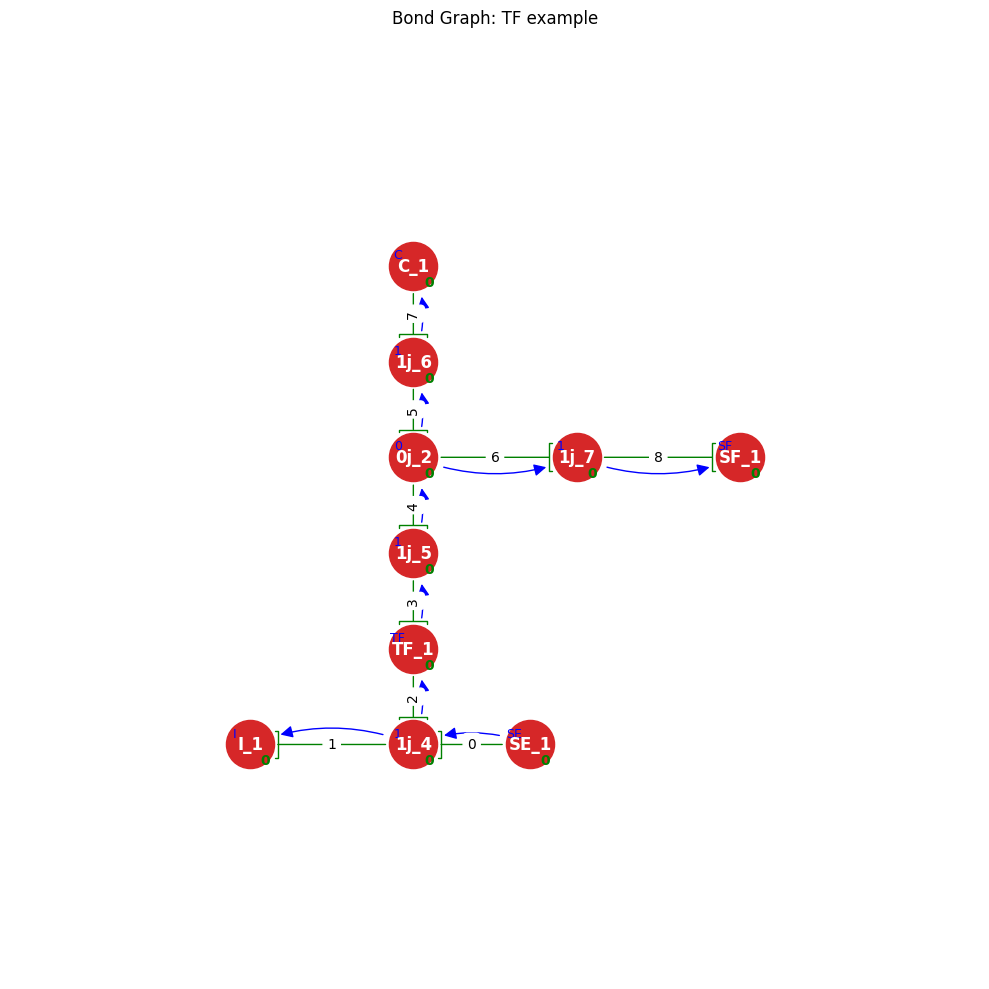

In [11]:

custom_layered_layout(model)

# Draw the graph
draw_bond_graph(model)

## State-space form sequence

In [12]:
# 5) Generate equations (NOT NESS later Cochy will do it)
eqgen = EquationGenerator(model, debug=True)
eqs = eqgen.generate_equations()
# eqgen.visualize_equations()
# print(eqs)

[TF] TF_1: bonds 2 <-> 3: e1=n*e2, f2=n*f1
[EquationGenerator] Generated equations:
   Eq(e0, SE1)
   Eq(f1, p3/I3)
   Eq(e7, q2/C2)
   Eq(f8, SF9)
   Eq(e2, e3*n0)
   Eq(f3, f2*n0)
   Eq(f1, f0)
   Eq(f2, f0)
   Eq(e0 - e1 - e2, 0)
   Eq(f4, f3)
   Eq(e3 - e4, 0)
   Eq(e5, e4)
   Eq(e6, e4)
   Eq(f4 - f5 - f6, 0)
   Eq(f7, f5)
   Eq(e5 - e7, 0)
   Eq(f8, f6)
   Eq(e6 - e8, 0)


In [13]:
cform = CauchyFormGenerator(model, debug=False)
# cform.debug = True
eqs = cform.build_cauchy_form()
print(eqs)

self.final_vars =  [SE1, p3, I3, n0, q2, C2, SF9]
START RECURECIEVE SUBS

[CAUCHY STATE 1] Исходное: dotp3 = e1

[CAUCHY STATE 2] Исходное: dotq2 = f7
[Eq(dotp3, SE1 - n0*q2/C2), Eq(dotq2, -SF9 + n0*p3/I3)]


In [14]:
print("User have to define the output variables for the system to make possive the output equations generation")
print(cform.get_all_ef_variables())

User have to define the output variables for the system to make possive the output equations generation
[e0, e1, e2, e3, e4, e5, e6, e7, e8, f0, f1, f2, f3, f4, f5, f6, f7, f8]


In [35]:
# cform.interactive_generate_output_equations()
# Instead of input we can provide variables via code
cform.generate_output_equations('e1,f1')

Debug state: False
Entered list ['e1', 'f1']
symb entered list [e1, f1]

[OUTPUT] ROW Eq for output variable: e1 [<class 'sympy.core.symbol.Symbol'>]

[OUTPUT] ROW Eq for output variable: f1 [<class 'sympy.core.symbol.Symbol'>]

[INFO] Output equations:
Eq(e1, e0 - e2)
Eq(f1, p3/I3)

[OUTPUT] Generating output equation for: 1

[CAUCHY OUT 1] Исходное: e1 = e0 - e2
my_subs {e2: n0*q2/C2, e0: SE1}

[OUTPUT] Generating output equation for: 2

[CAUCHY OUT 2] Исходное: f1 = p3/I3
my_subs {}


[Eq(e1, SE1 - n0*q2/C2), Eq(f1, p3/I3)]

In [36]:
print(f"System has variables:{cform.final_vars}")

System has variables:[SE1, p3, I3, n0, q2, C2, SF9]


## Make state-space eq in matrix from

In [37]:
ssb = StateSpaceBuilder(model, cform, debug=False)
A, B, C, D = ssb.build_state_space()

In [38]:
ssb.x_vars, ssb.u_vars

([p3, q2], [SE1, SF9])

In [39]:
A, B , C, D 

(Matrix([
 [    0, -n0/C2],
 [n0/I3,      0]]),
 Matrix([
 [1,  0],
 [0, -1]]),
 Matrix([
 [   0, -n0/C2],
 [1/I3,      0]]),
 Matrix([
 [1, 0],
 [0, 0]]))

## Optional. Go to numerical matrixes and check stability 

In [75]:
from sympy import Matrix

A_num = A.subs({'n0': 2.0, 'C2': 0.01, 'I3': 1.0})
print('A matrix:', A_num)
print('Eigenvalues of A:', A_num.eigenvals())

A matrix: Matrix([[0, -200.000000000000], [2.00000000000000, 0]])
Eigenvalues of A: {-20.0*I: 1, 20.0*I: 1}


## Make numerical matrixes from symbolic

In [42]:
sim = BondGraphSimulator(model, ssb)

sim.print_simulation_requirements()  # shows the required parameters (order is important)

=== Required Data for Numerical Simulation ===
System parameters (provide param_values: dict[str, float]):
    C2, I3, n0
   Example: param_values = {'R1': 10.0, 'C2': 0.001, 'L3': 0.1}

State variables (provide x0: list[float], in the same order):
    p3, q2
   Example: x0 = [0.0, 0.0]   # (e.g., q2=0, p3=0)
[p3, q2]
Input variables (provide u_func: Callable[[float], list[float]], in the same order):
    SE1, SF9
   Example: u_func = lambda t: [1.0]   # if a single input, e.g., SE0=1 always
           u_func = lambda t: [np.sin(t)]  # sinusoidal input
-------------------------------------------------------
Full function call:
  result = sim.simulate(param_values, t_span=(0, 5), x0=x0, u_func=u_func)
  t, y = result['t'], result['y']


In [43]:
initial_state = [0.0] * len(sim.ss.x_vars) # fill zeros or define custom list as shown in DEMO 1
num_steps  = 501

subi = [0.0]*len(sim.ss.u_vars)
input_sequence = [subi for _ in range(num_steps)] # inputs are zeros
# lets set all velocity 0 (fixed frame), and forces 1 (suppose gravity)
for ix, u in enumerate(sim.ss.u_vars):
    for i in range(num_steps):
        if str(u)[:2] == 'SE':
            input_sequence[i][ix] = 1.0


In [44]:
input_sequence

[[1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],

In [ ]:
simulation_time_to = 10 # sec
time_steps = np.linspace(0, simulation_time_to, num_steps)
sampling_period = time_steps[1] - time_steps[0] # sampling_period=0.05


print("Give parameter values for the simulation as a dictionary {param_name: value}")
print(f"param names:{sim.param_names}")


Необходимо задать значения 
параметров системы:['C2', 'I3', 'n0']


In [ ]:
# parameter_values = {'C3': 1/1.1, 'I2': 1.01, 'R1': 1.01} # С is complaence (not stifness K)
k = 0.1 # stifness
C = 1 / k # complaence

parameter_values = {'C2':10.1, 'I3':1.5, 'n0':1}
result = sim.simulate(initial_state, input_sequence, time_steps, sampling_period, parameter_values)

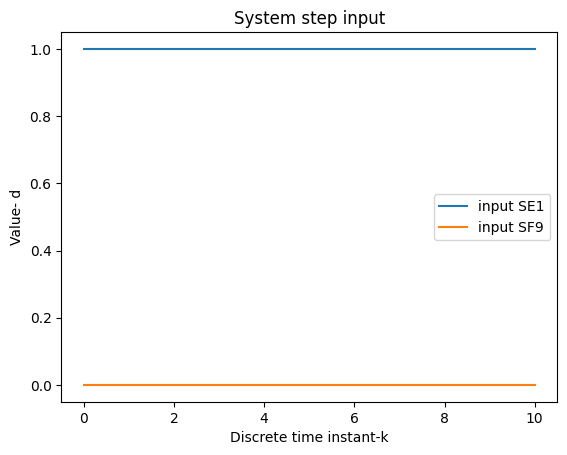

In [76]:
# Visualize inputs
for ix, input_name in enumerate(sim.ss.u_vars):
    plt.plot(result['t'], result['u'][:,ix], label={"input "+ str(input_name)})

plt.xlabel('Discrete time instant-k')
plt.ylabel('Value- d')

plt.title('System step input')
plt.legend()
plt.show()

y.shape= (501, 2)
output_names= ['y1', 'y2']


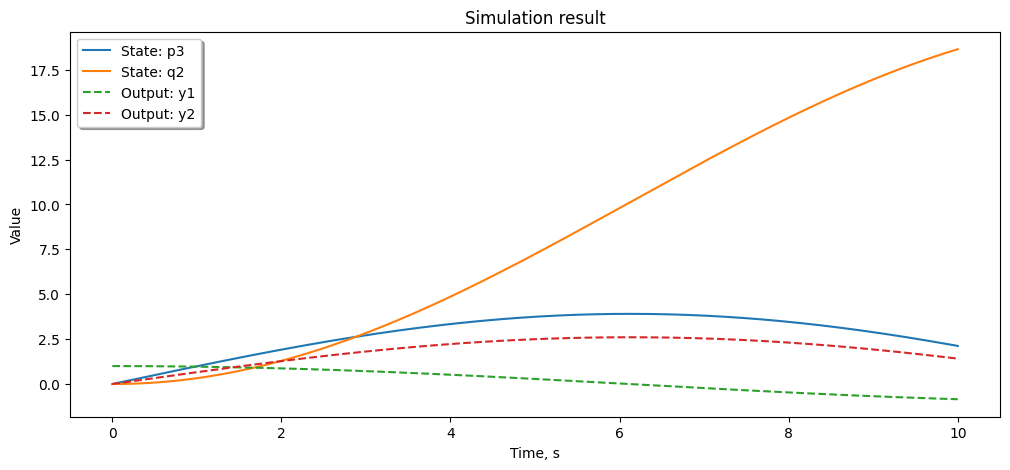

aka [e1, f1]


In [77]:
# STEP RESPONSE PLOTTING (state and output variables)
state_names = [str(s) for s in sim.ss.x_vars]        # ['q2', 'p3', ...]
output_names = [str(y) for y in sim.ss.output_vars]  # ['e4', 'f7', ...]

sim.plot_simulation_result(result, state_names, output_names)
print( "aka", sim.ss.output_vars)